In [18]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib as mtb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
#read the dataset
file_path = r"C:\Users\91835\retail_sales_dataset.csv"
rsd = pd.read_csv(file_path)
rsd

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [7]:
#find missing values in dataset
missing_values = rsd.isnull().sum()
print(missing_values)

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [8]:
#drop null values
rsd_cleaned = rsd.dropna()

In [9]:
#convert attribute dtatype to the datatype as that of the column
rsd_cleaned['Date'] = pd.to_datetime(rsd_cleaned['Date'])
rsd_cleaned['Quantity'] = pd.to_numeric(rsd_cleaned['Quantity'],errors = 'coerce')
rsd_cleaned['Price per Unit'] = pd.to_numeric(rsd_cleaned['Price per Unit'], errors = 'coerce')
rsd_cleaned['Total Amount'] = rsd_cleaned['Quantity'] * rsd_cleaned['Price per Unit']


In [10]:
#cleaned dataset
rsd_cleaned.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [11]:
#find mean,median,mode and standard deviation of all numeric columns
numeric_columns = rsd_cleaned.select_dtypes(include='number').columns

Statistics = {
    'Mean' : rsd_cleaned[numeric_columns].mean(),
    'Median' : rsd_cleaned[numeric_columns].median(),
    'Mode' : rsd_cleaned[numeric_columns].mode().iloc(0),
    'standard deviation' : rsd_cleaned[numeric_columns].std()
}

for stat, value in Statistics.items():
    print(f"\n{stat}:\n{value}")


Mean:
Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median:
Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode:

standard deviation:
Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


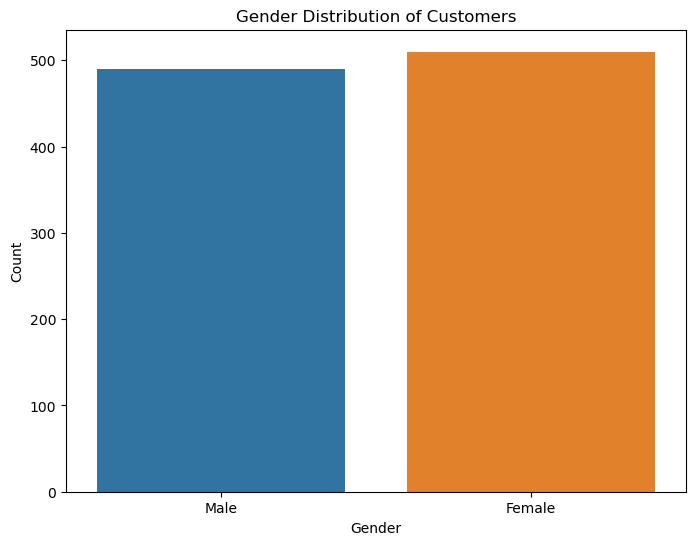

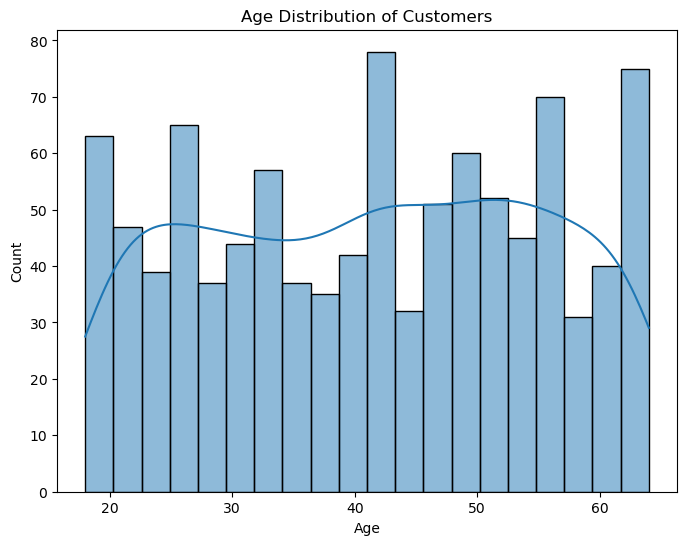

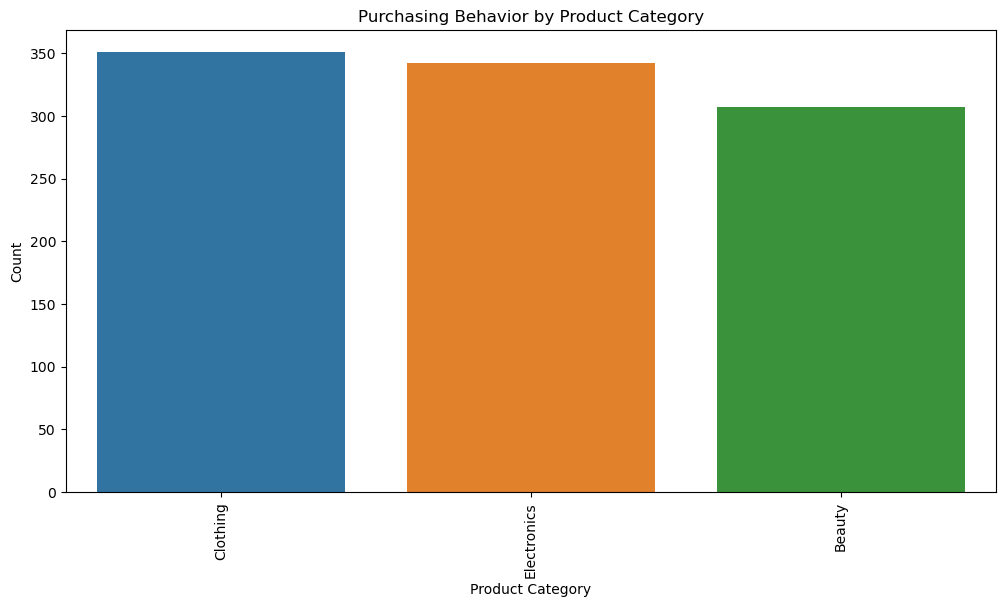

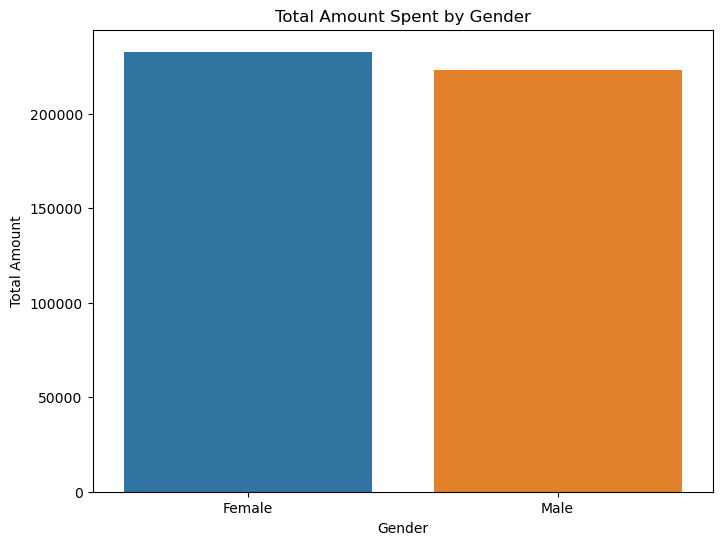

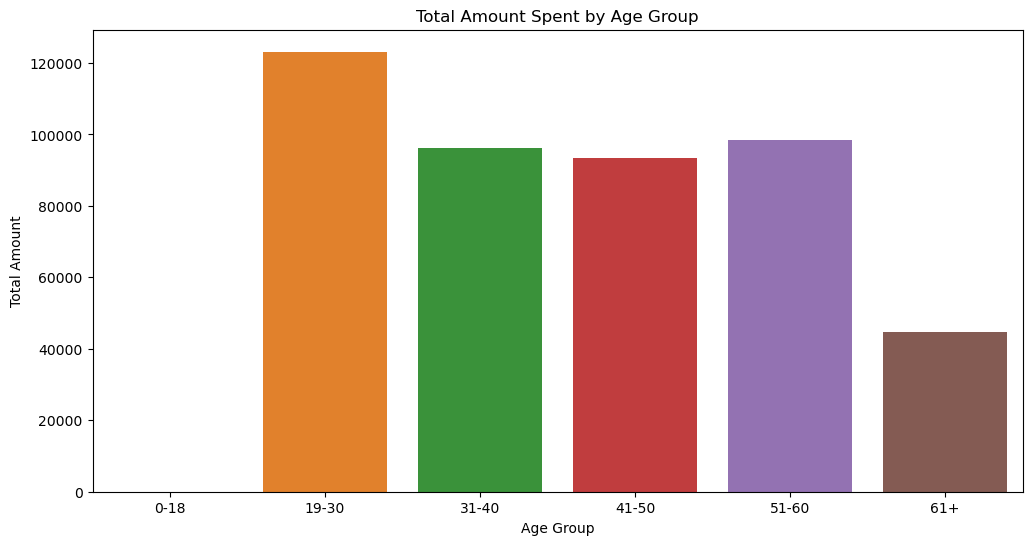

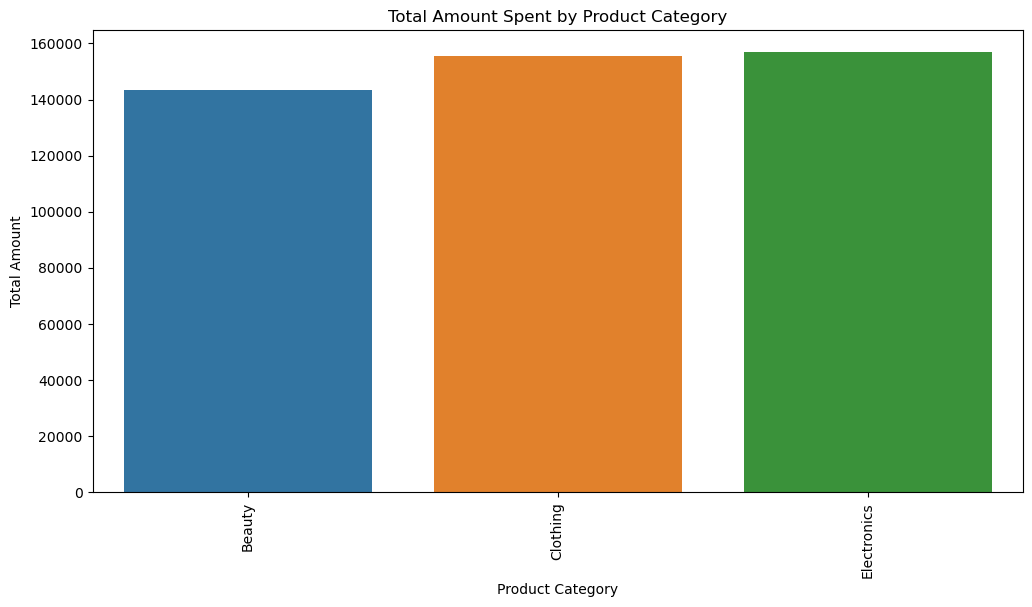

In [19]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=rsd_cleaned, x='Gender')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=rsd_cleaned, x='Age', bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Purchasing behavior based on product categories
plt.figure(figsize=(12, 6))
sns.countplot(data=rsd_cleaned, x='Product Category', order=rsd_cleaned['Product Category'].value_counts().index)
plt.title('Purchasing Behavior by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Total amount spent by different demographic groups
# By Gender
total_amount_by_gender = rsd_cleaned.groupby('Gender')['Total Amount'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=total_amount_by_gender, x='Gender', y='Total Amount')
plt.title('Total Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

# By Age Group
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']
rsd_cleaned['Age Group'] = pd.cut(rsd_cleaned['Age'], bins=bins, labels=labels, right=False)
total_amount_by_age_group = rsd_cleaned.groupby('Age Group')['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=total_amount_by_age_group, x='Age Group', y='Total Amount')
plt.title('Total Amount Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

# By Product Category
total_amount_by_category = rsd_cleaned.groupby('Product Category')['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=total_amount_by_category, x='Product Category', y='Total Amount', order=total_amount_by_category['Product Category'])
plt.title('Total Amount Spent by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.show()


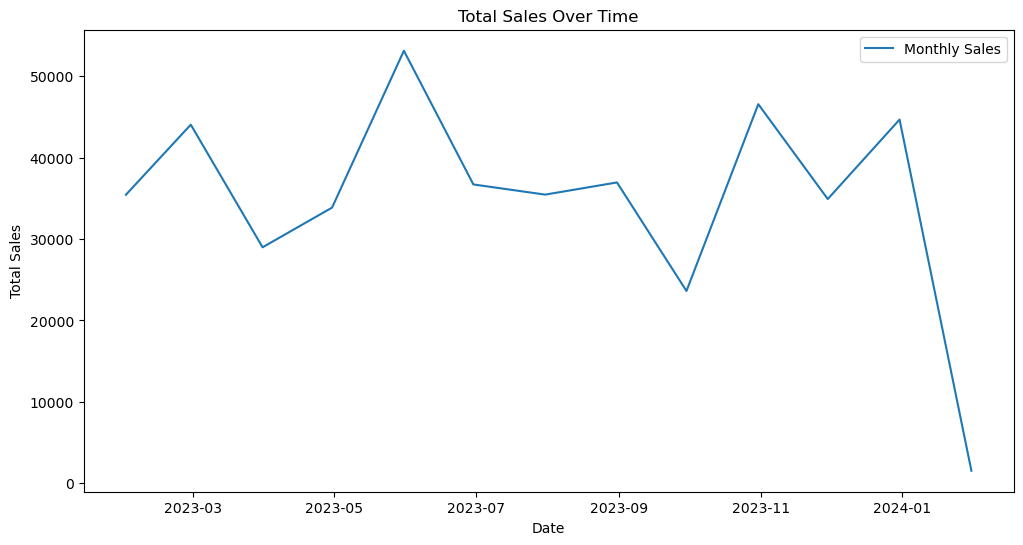

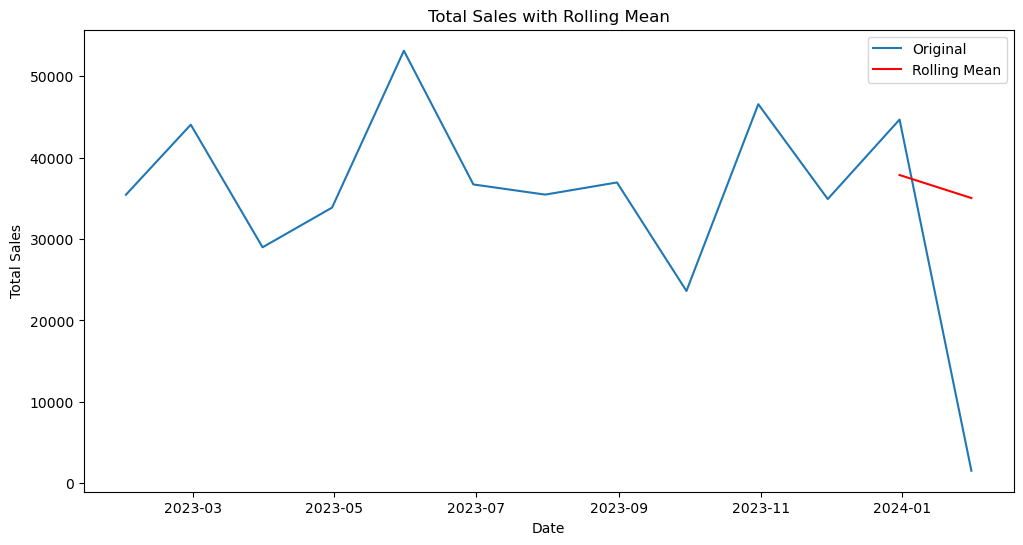

In [20]:
# Set the 'Date' column as the index
rsd_cleaned.set_index('Date', inplace=True)

# Resample the data by month and sum the 'Total Amount'
monthly_sales = rsd_cleaned['Total Amount'].resample('M').sum()

# Plot the total sales over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Calculate the rolling mean to smooth the time series
rolling_mean = monthly_sales.rolling(window=12).mean()

# Plot the original time series and the rolling mean
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.title('Total Sales with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


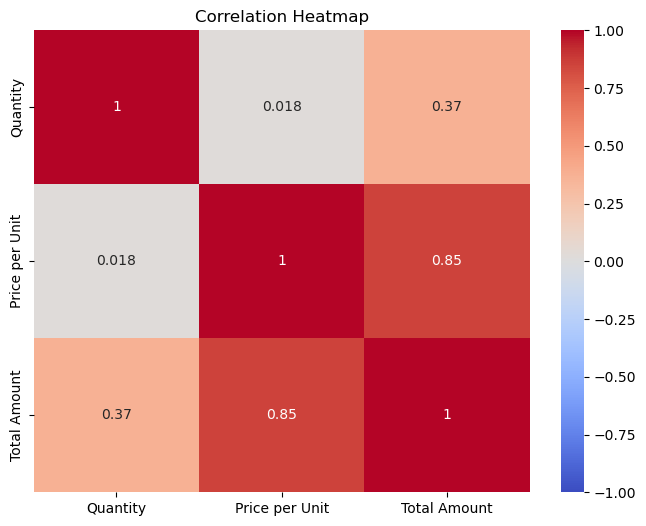

In [21]:
# Correlation matrix
corr_matrix = rsd_cleaned[['Quantity', 'Price per Unit', 'Total Amount']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
